In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



### Ejercicio A

In [103]:
df = pd.read_csv('../data/Titanic-Dataset.csv')
df_original = df.copy()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [104]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Ejercicio B


In [105]:
print('=== Cantidad de valores nulos por columna ===')
df.isnull().sum()

=== Cantidad de valores nulos por columna ===


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [106]:
print('=== Porcentaje de valores nulos por columna ===')
print((df.isnull().sum() / len(df)) * 100)

=== Porcentaje de valores nulos por columna ===
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


### Ejercicio C


In [107]:
## Borramos la columna Cabin porque tiene muchos valores nulos
df = df.drop(columns=['Cabin'])

## Borramos las filas con valores nulos en la columna Embarked
df = df.dropna(subset=['Embarked'])



df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,889.000000,889.000000,889.000000,889,889,712.000000,889.000000,889.000000,889,889.000000,889
unique,NaN,NaN,NaN,889,2,NaN,NaN,NaN,680,NaN,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,644
mean,446.000000,0.382452,2.311586,NaN,NaN,29.642093,0.524184,0.382452,NaN,32.096681,NaN
std,256.998173,0.486260,0.834700,NaN,NaN,14.492933,1.103705,0.806761,NaN,49.697504,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,224.000000,0.000000,2.000000,NaN,NaN,20.000000,0.000000,0.000000,NaN,7.895800,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN
75%,668.000000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN


### EjercicioD

In [108]:
# Extraer título con regex
df['Title'] = df['Name'].str.extract(r',\s*([^\.]*)\.')

# Normalizar títulos
df['Title'] = df['Title'].replace({
    'Mlle': 'Miss', 'Ms': 'Miss',
    'Mme': 'Mrs'
})
# Reemplazar el resto como "Others"
df['Title'] = df['Title'].apply(lambda x: x if x in ['Mr','Miss','Mrs','Master'] else 'Others')

df['Title'].value_counts()

#Ajustar edad por titulo
df['Age'] = df.groupby('Title')['Age'].transform(lambda s: s.fillna(s.median()))

df['Age'].value_counts()



Age
30.00    144
21.00     60
35.00     35
24.00     30
22.00     27
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: count, Length: 90, dtype: int64

### EjercicioF

In [109]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df[['SibSp','Parch','FamilySize']].head(10)

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1
5,0,0,1
6,0,0,1
7,3,1,5
8,0,2,3
9,1,0,2


### Ejercicio G

In [110]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1}).astype('Int64')


In [111]:
df = pd.get_dummies(
    df,
    columns=['Embarked', 'Title', 'Pclass'],
    prefix={'Embarked':'Embarked', 'Title':'Title', 'Pclass': "Pclass"},
    drop_first=True
)

df.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,FamilySize,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Others,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2,False,True,False,True,False,False,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,2,False,False,False,False,True,False,False,False
2,3,1,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,1,False,True,True,False,False,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2,False,True,False,False,True,False,False,False
4,5,0,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,1,False,True,False,True,False,False,False,True


### Ejercicio I

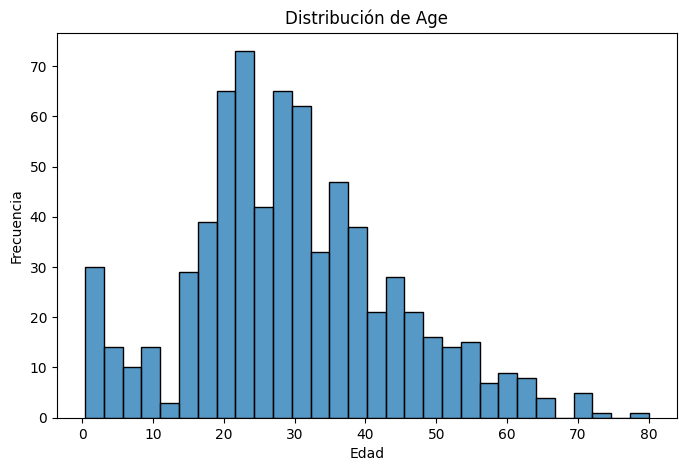

In [112]:
## Histograma de age
plt.figure(figsize=(8,5))
sns.histplot(df_original['Age'], bins=30, kde=False)  # kde=True si querés la curva de densidad
plt.title('Distribución de Age')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

/var/folders/cq/_rp4r1tj68152tb945d33w740000gn/T/ipykernel_97578/1790313378.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_original, x='Pclass', y='Survived', hue='Sex', ci=None)


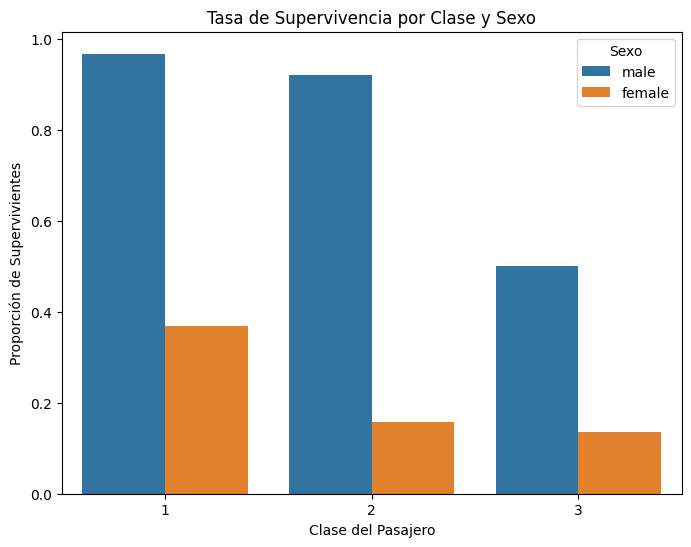

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data=df_original, x='Pclass', y='Survived', hue='Sex', ci=None)

plt.title('Tasa de Supervivencia por Clase y Sexo')
plt.xlabel('Clase del Pasajero')
plt.ylabel('Proporción de Supervivientes')
plt.legend(title='Sexo', labels=['female', 'male'])
plt.show()

In [118]:
df_original.groupby(['Pclass','Sex'])['Survived'].mean()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64